# Feature Selection - Information Gain - Mutual Information - Regression Problem Statements
### Mutual Information
Esitmate mutual information for a continuous target feature.

Mutual Information between two random features is a non-negative value, which measures the dependency between the features. It is equal to zero if and only if two random features are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbours distances.

In short

A quantity called mutual information measures the amount of information one can obtain from one random feature given another. 

The mutual information between two random features X and Y can be stated formally as follows:

**I(X; Y) = H(X) - H(X|Y) Where I(X; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X|Y) is the conditional entropy for X given Y. The result has the units of bits.**

### Importing required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Importing the dataset

df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Extracting the numerical features

In [10]:
pd.set_option('display.max_columns', None)

numeric_lst = [feature for feature in df.columns if df[feature].dtypes in ['int64', 'float64']]
df_numeric = df[numeric_lst]
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [11]:
df_numeric.shape

(1460, 38)

In [13]:
# Dropping the Id feature

df_numeric.drop('Id', axis = 1, inplace=True)
df_numeric.shape

C:\Users\podug\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1460, 37)

### Splitting the dataset into Training and Test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_numeric.iloc[:, :-1], 
                                                    df_numeric['SalePrice'], 
                                                    test_size=0.3, 
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [27]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

### Mutual Information

In [28]:
from sklearn.feature_selection import mutual_info_regression

# Determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.25481625, 0.21109874, 0.16464235, 0.52972533, 0.10131048,
       0.3491782 , 0.25196362, 0.1078638 , 0.15300168, 0.0028385 ,
       0.11102729, 0.38180964, 0.31378432, 0.22311729, 0.01161658,
       0.48259161, 0.03402628, 0.00742349, 0.26522558, 0.07210266,
       0.04254325, 0.03831955, 0.1828009 , 0.17381336, 0.26739975,
       0.36756566, 0.36741387, 0.06358854, 0.17260241, 0.01988574,
       0.        , 0.02897047, 0.00883394, 0.        , 0.        ,
       0.00417544])

In [31]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.529725
GrLivArea        0.482592
TotalBsmtSF      0.381810
GarageCars       0.367566
GarageArea       0.367414
YearBuilt        0.349178
1stFlrSF         0.313784
GarageYrBlt      0.267400
FullBath         0.265226
MSSubClass       0.254816
YearRemodAdd     0.251964
2ndFlrSF         0.223117
LotFrontage      0.211099
TotRmsAbvGrd     0.182801
Fireplaces       0.173813
OpenPorchSF      0.172602
LotArea          0.164642
BsmtFinSF1       0.153002
BsmtUnfSF        0.111027
MasVnrArea       0.107864
OverallCond      0.101310
HalfBath         0.072103
WoodDeckSF       0.063589
BedroomAbvGr     0.042543
KitchenAbvGr     0.038320
BsmtFullBath     0.034026
ScreenPorch      0.028970
EnclosedPorch    0.019886
LowQualFinSF     0.011617
PoolArea         0.008834
BsmtHalfBath     0.007423
YrSold           0.004175
BsmtFinSF2       0.002838
MoSold           0.000000
3SsnPorch        0.000000
MiscVal          0.000000
dtype: float64

### Feature Selection

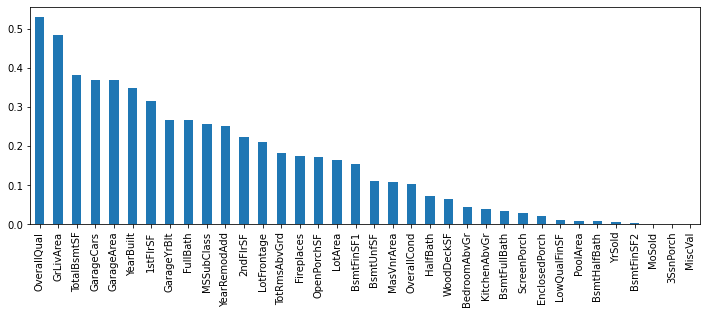

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,4))

In [34]:
from sklearn.feature_selection import SelectPercentile

In [36]:
# Select the top 20 percentile

# Creating an instance of SelectPercentile
select_top_features = SelectPercentile(mutual_info_regression, percentile=20)
select_top_features.fit(X_train.fillna(0), y_train)
X_train.columns[select_top_features.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')